# Exploretory data analysis on risk factors involved in investment by Deutch Bank

## Background
Deutsche Bank is a multinational investment bank and financial services company. It offers a range of investment products to its clients, including stocks, bonds, and derivatives. The bank is concerned about the risk of investment in various products and wants to use data analysis to identify and manage potential risks.

## Objective

To perform data analysis on the investment products offered by Deutsche Bank and identify potential risks associated with each product.

Technical chart for the reliance industries: 

1. MACD
2. Momentum (MOM)
3. Stochastic (STO)
4. CCI

## Deutsch Bank share
With this dataset, we could perform a wide range of analyses and visualizations to understand how the stock price of Deutsche Bank has changed over time, and to identify trends or patterns in the data. 

For example, we could:

- Create a line chart showing the daily closing price of the stock over time.
- Calculate the daily percentage change in the stock price, and create a histogram or density plot to visualize the distribution of these changes.
- Use technical analysis tools to identify patterns or trends in the stock price, such as moving averages or support/resistance levels.
- Perform a regression analysis to model the relationship between the stock price and other variables, such as market indices or macroeconomic indicators.
- Use machine learning algorithms to predict future stock prices based on historical data.

So, I will start with few basic things with these datas over time and compare them with each other.

1. **Basic data exploration:** You can use pandas to perform basic exploration of the data, such as checking the dimensions of the DataFrame, looking at summary statistics, or checking for missing values
    - summary statistics: `.describe()`
    - dimensions of the DataFrame: `.shape()`
    - check for missing values: `.isnull().sum())`
2. Visualize the data using matplotlib and seaborn

3. Calculate returns

4. Analyze relationships between variables

5. Rolling statistics

### About data

To begin the analysis, the bank collects data on its investment products over the past 10 years. The data includes information on the product type, issuer, maturity date, credit rating, and other relevant factors that could impact risk.

**Table summary:**

| Sr. No. | Date | Open | High | Low | Close | Adj Close | Volume |
|---------|------|------|------|-----|-------|-----------|--------|
| ||||||||

Here individual columns are

| Column name | Description |
|-------------|-------------|
| Date | The date of the stock price, in a standardized format (e.g. YYYY-MM-DD). |
| Open | The opening price of the stock on that day. | 
| High |  The highest price of the stock on that day. |
| Low | The lowest price of the stock on that day. |
| Close | The closing price of the stock on that day. |
| Adj Close | The adjusted closing price of the stock on that day. This takes into account any corporate actions (such as stock splits or dividends) that may have affected the stock price. |
| Volume | The volume of shares traded on that day. |

### Data Download & preparation for analysis

There are two ways, we can download the data:

1. **Using url:**

    You can follow, steps in the Jupyter notebook:
    - Step-1: `dataset_url = 'https://investor-relations.db.com/share/share-information/historical-share-prices'`
    - Step-2: Import opendatasets to load the dataset from the url.
        ```
        import opendatasets as od
        od.download(dataset_url)
        ```
    This will download the dataset to a local temp folder. Now we need to change the directory.
    - Step-3: Use `data_dir = './'` to shift the datafiles in the directory where this notebook is present. 
    - Step-4: We can list the datset using
        ```
        import os
        os.listdir(data_dir)
        ```
    - Step-5: Rename the project to `project_name = "Deutch-bank-share" # change this (use lowercase letters and hyphens only)`
    - Step-6: Import the file in notebook:
        ```
        dbbank_df = pd.read_csv('deutschebank_share_prices.csv')
        ```
    - Step-7: Here we see that, in the dataframe, first 4 rows are useless and we need to drop them and set fifth row as a column name. 
        ```
        # Read the CSV file and skip the fourth and fifth rows
        dbbank_df = pd.read_csv('deutschebank_share_prices.csv', header=4, skiprows=[5])
        # Set the values in the fifth row as the column names
        dbbank_df.columns = dbbank_df.iloc[0]
        dbbank_df = dbbank_df[1:]
        ```


2. **Using yahoo finance:** Here we can also import data from yahoo using `yfinance` library. In the present notebook, we have used yfinance method (see below).

### Importing important libraries

1. **Numpy:** NumPy is a Python library for scientific computing that provides support for arrays, matrices, and mathematical functions. It is one of the most widely used libraries in the scientific Python ecosystem, and is a fundamental building block for many other Python libraries. NumPy provides the ndarray (n-dimensional array) data structure, which is a collection of elements of the same type, indexed by a tuple of non-negative integers. NumPy also provides a large number of mathematical functions for manipulating arrays, such as mathematical operations (addition, subtraction, multiplication, division, etc.), statistical operations (mean, variance, standard deviation, etc.), and linear algebra operations (matrix multiplication, eigenvalues, etc.).

2. **Pandas:** Pandas is an open-source Python library that is widely used for data manipulation and analysis. One of the most popular features of Pandas is the DataFrame. It is a two-dimensional table-like data structure that allows you to store and manipulate data in a way that is similar to a spreadsheet. A DataFrame consists of rows and columns, where each row represents a unique observation or record, and each column represents a variable or feature of that observation. You can think of a DataFrame as a spreadsheet, where each row is a record, and each column is a field.

3. **Matplotlib:** Matplotlib is a Python library for data visualization that provides a wide range of tools for creating different types of charts and plots. It is one of the most widely used visualization libraries in the scientific Python ecosystem. Matplotlib provides a variety of functions and classes for creating visualizations, such as scatter plots, line charts, bar charts, histograms, and more. These visualizations can be customized in many ways, including changing the colors, labels, axes, and annotations.

4. **Seaborn:** Seaborn is a Python data visualization library built on top of Matplotlib that provides a high-level interface for creating informative and attractive statistical graphics. It provides a range of functions for visualizing data, including categorical data, relational data, and distributional data. Seaborn includes several built-in datasets that can be loaded directly into a DataFrame, making it easy to get started with visualization. The library also provides a variety of options for customizing charts and plots, such as color palettes, themes, and styles.


In this tutorial, we will learn how to create and manipulate DataFrames using and plot using matplotlib/seaborn python libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
# plt.style.use('ggplot')

In [2]:
%pip install --upgrade pandas-datareader --upgrade --quiet


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
from pandas_datareader import data, wb
import pandas_datareader as pdr
import pandas_datareader.data as pdr
import datetime as dt

In [4]:
# installing yfinance library
%pip install yfinance --upgrade --quiet


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
# importing yfinance in the notebook.
import yfinance as yf

#### Creating a DataFrame

In [6]:
# Download Deutsche Bank historical data from Yahoo Finance
dbbank_df = yf.download("DB", start="1997-11-28", end="2023-02-27")

# Display the first five rows of the dataframe
dbbank_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-11-28,61.784351,62.022900,61.068703,61.784351,45.205997,4506
1997-12-01,62.142178,62.380726,61.426525,62.142178,45.467808,1258
1997-12-02,61.426525,62.142178,61.426525,61.426525,44.944183,2410
1997-12-03,61.426525,61.903625,61.307251,61.426525,44.944183,1153
1997-12-04,62.261452,62.738548,62.022900,62.261452,45.555077,1991


If the numbers are spearted by comma, then we need to replace the comma with the empty string. For example, let us suppose that Volumne column comes with comma in between the numbers (example Volumne= 23,04,870). 

`dbbank_df['Volume'] = dbbank_df['Volume'].str.replace(',', '')`

and then if the datatype is not integer, then we can use following to convert it to the integer format.

`dbbank_df['Volume'] = dbbank_df['Volume'].astype(int)`

In [7]:
# checking the columns of the dataframe.
dbbank_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
# checking the index of the dataframe and its datatype.
dbbank_df.index

DatetimeIndex(['1997-11-28', '1997-12-01', '1997-12-02', '1997-12-03',
               '1997-12-04', '1997-12-05', '1997-12-08', '1997-12-09',
               '1997-12-10', '1997-12-11',
               ...
               '2023-02-10', '2023-02-13', '2023-02-14', '2023-02-15',
               '2023-02-16', '2023-02-17', '2023-02-21', '2023-02-22',
               '2023-02-23', '2023-02-24'],
              dtype='datetime64[ns]', name='Date', length=6351, freq=None)

In [9]:
# checking the datatype of the dataframe
dbbank_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Here see that that, we don't need to change the datatype as all columns are in correct datatype format. If they are not in correct dattype, we can use 

`dbbank_df['Open'] = dbbank_df['Open'].astype(float)`. 

Similalry for all others, we can do the same.

In [10]:
# # Set the "Date" column as the index of the DataFrame
#dbbank_df.set_index(dbbank_df['Date'], inplace=True)

In [11]:
# checking missing values i.e. NaN values
dbbank_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

so good thing is we don't have any missing values in the dataframe of dbabnk.

In [12]:
# now we need to find duplicate entries.
dbbank_df.duplicated()

Date
1997-11-28    False
1997-12-01    False
1997-12-02    False
1997-12-03    False
1997-12-04    False
              ...  
2023-02-17    False
2023-02-21    False
2023-02-22    False
2023-02-23    False
2023-02-24    False
Length: 6351, dtype: bool

So we don't have any duplicate values.

In [13]:
# shape of the dataframe
dbbank_df.shape

(6351, 6)

### Data Analysis
To analyze the investment products, the bank uses Python libraries such as `numpy`, `scipy`, and `pandas` to perform statistical analysis on the data.

1. First, the bank performs a descriptive analysis of the data to understand the distribution of investment products across various categories. This includes analyzing the frequency of each product type, issuer, and credit rating.

2. Next, the bank uses machine learning techniques such as clustering and classification to identify patterns and potential risks in the data. For example, the bank may use a clustering algorithm to group similar investment products together based on their characteristics, such as credit rating and maturity date. The bank can then analyze the risk profile of each cluster and take appropriate measures to manage the risks.

3. The bank may also use classification algorithms to predict the likelihood of default or other risks associated with a particular investment product. This can help the bank make informed decisions about which products to invest in and which to avoid.

4. Finally, the bank visualizes the data using Python libraries such as `matplotlib` and `seaborn` to communicate the findings to stakeholders. This includes creating charts and graphs that show the distribution of investment products across various categories, as well as the risk profile of each product.

In our present analysis, we will mostly focus on some of the basic type of data anlysis discuss in the 'Data Collection and preparation' section.

#### 1. Basic data exploration
We can use pandas to perform basic exploration of the data, such as checking the dimensions of the DataFrame, looking at summary statistics, or checking for missing values
- summary statistics: `.describe()`
- dimensions of the DataFrame: `.shape()`

##### 1.1. Basic statistics

- Mean, count, stdandard deviation, min, max, etc.

In [14]:
# now checking basic statistics of the dataframe
dbbank_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6.351000e+03
mean,50.593650,51.097835,50.066552,50.605097,40.411898,2.077368e+06
std,33.130841,33.392816,32.883335,33.157375,24.599357,2.985904e+06
min,5.030000,5.680000,4.990000,5.480000,5.364974,0.000000e+00
25%,18.139999,18.230000,17.950001,18.065000,17.080500,9.217150e+04
50%,48.339695,48.969467,47.652672,48.234734,39.651821,1.073886e+06
75%,71.493320,72.197044,70.610687,71.488552,55.207382,3.068910e+06
max,151.812973,152.442749,150.505722,152.280533,116.956512,7.017620e+07


In [15]:
# finding maximum in each column
dbbank_df.max()

Open         1.518130e+02
High         1.524427e+02
Low          1.505057e+02
Close        1.522805e+02
Adj Close    1.169565e+02
Volume       7.017620e+07
dtype: float64

In [16]:
# finding minimum in each column
dbbank_df.min()

Open         5.030000
High         5.680000
Low          4.990000
Close        5.480000
Adj Close    5.364974
Volume       0.000000
dtype: float64

Locating particular data (rows of data):

##### 1.2. Locating a data

In [17]:
dbbank_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-11-28,61.784351,62.022900,61.068703,61.784351,45.205997,4506
1997-12-01,62.142178,62.380726,61.426525,62.142178,45.467808,1258
1997-12-02,61.426525,62.142178,61.426525,61.426525,44.944183,2410
1997-12-03,61.426525,61.903625,61.307251,61.426525,44.944183,1153
1997-12-04,62.261452,62.738548,62.022900,62.261452,45.555077,1991


In [18]:
# Finding one row
dbbank_df.loc['1997-11-28']

Open           61.784351
High           62.022900
Low            61.068703
Close          61.784351
Adj Close      45.205997
Volume       4506.000000
Name: 1997-11-28 00:00:00, dtype: float64

In [19]:
# Finding rows of data of 2023
dbbank_df.loc['2023-01-01':].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,11.71,11.79,11.60,11.71,11.71,4901900
2023-01-04,12.27,12.55,12.24,12.48,12.48,8714500
2023-01-05,12.16,12.18,12.05,12.14,12.14,4718300
2023-01-06,12.15,12.44,12.09,12.44,12.44,3279200
2023-01-09,12.53,12.65,12.43,12.44,12.44,5638700


In [20]:
# Finding rows of data of two months
dbbank_df.loc['2023-01-01':'2023-03-01'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,11.71,11.79,11.60,11.71,11.71,4901900
2023-01-04,12.27,12.55,12.24,12.48,12.48,8714500
2023-01-05,12.16,12.18,12.05,12.14,12.14,4718300
2023-01-06,12.15,12.44,12.09,12.44,12.44,3279200
2023-01-09,12.53,12.65,12.43,12.44,12.44,5638700


The `iloc()` function in python is one of the functions defined in the Pandas module that helps us to select a specific row or column from the data set. Using the `iloc()` function in python, we can easily retrieve any particular value from a row or column using index values.

In [21]:
dbbank_df.iloc[0]

Open           61.784351
High           62.022900
Low            61.068703
Close          61.784351
Adj Close      45.205997
Volume       4506.000000
Name: 1997-11-28 00:00:00, dtype: float64

So this is equivalent to `dbbank_df.loc['1997-11-28']`. So `iloc[0]` gives the first entry of the dataframe. This method is specially important, when we only have information on index.

In [22]:
# finding last entry
dbbank_df.iloc[-1]

Open              11.97
High              12.03
Low               11.89
Close             11.97
Adj Close         11.97
Volume       2870300.00
Name: 2023-02-24 00:00:00, dtype: float64

In [22]:
dbbank_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-17,12.61,12.72,12.58,12.72,12.72,3250900
2023-02-21,12.33,12.44,12.22,12.28,12.28,3223200
2023-02-22,12.14,12.23,12.05,12.18,12.18,2211000
2023-02-23,12.21,12.24,12.08,12.16,12.16,2274500
2023-02-24,11.97,12.03,11.89,11.97,11.97,2870300


In [24]:
dbbank_df.Close

Date
1997-11-28    61.784351
1997-12-01    62.142178
1997-12-02    61.426525
1997-12-03    61.426525
1997-12-04    62.261452
                ...    
2023-02-17    12.720000
2023-02-21    12.280000
2023-02-22    12.180000
2023-02-23    12.160000
2023-02-24    11.970000
Name: Close, Length: 6351, dtype: float64

In [23]:
type(dbbank_df.Close)

pandas.core.series.Series

##### 1.3. Daily changes & normalization

Here in this section, we will do our calculation in a copied dataframe, so that our original dataframe remain intact while doing these calculations for our future references.

In [117]:
dbbank_df1=dbbank_df.copy()
dbbank_df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-11-28,61.784351,62.022900,61.068703,61.784351,45.205997,4506
1997-12-01,62.142178,62.380726,61.426525,62.142178,45.467808,1258
1997-12-02,61.426525,62.142178,61.426525,61.426525,44.944183,2410
1997-12-03,61.426525,61.903625,61.307251,61.426525,44.944183,1153
1997-12-04,62.261452,62.738548,62.022900,62.261452,45.555077,1991


In [25]:
# daily change = Open price - Closing price
daily_dbchange =  dbbank_df1['Open']-dbbank_df1['Close']
daily_dbchange

Date
1997-11-28    0.000000
1997-12-01    0.000000
1997-12-02    0.000000
1997-12-03    0.000000
1997-12-04    0.000000
                ...   
2023-02-17   -0.110001
2023-02-21    0.050000
2023-02-22   -0.040000
2023-02-23    0.050000
2023-02-24    0.000000
Length: 6351, dtype: float64

In [26]:
type(daily_dbchange)

pandas.core.series.Series

In [27]:
# daily percentage changes
dailyperc_dbchange = ((dbbank_df1['Close']-dbbank_df1['Open']) / dbbank_df1['Open'])*100
dailyperc_dbchange

Date
1997-11-28    0.000000
1997-12-01    0.000000
1997-12-02    0.000000
1997-12-03    0.000000
1997-12-04    0.000000
                ...   
2023-02-17    0.872328
2023-02-21   -0.405517
2023-02-22    0.329489
2023-02-23   -0.409502
2023-02-24    0.000000
Length: 6351, dtype: float64

**Normalizing data:**

In [28]:
# finding first entry in the Close column
dbbank_df1['Close'].iloc[0]

61.78435134887695

In [30]:
# finding last entry in the Close column
dbbank_df1['Close'].iloc[-1]

11.970000267028809

In [31]:
# we can see that last entry can be seen through following
dbbank_df1.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-17,12.61,12.72,12.58,12.72,12.72,3250900
2023-02-21,12.33,12.44,12.22,12.28,12.28,3223200
2023-02-22,12.14,12.23,12.05,12.18,12.18,2211000
2023-02-23,12.21,12.24,12.08,12.16,12.16,2274500
2023-02-24,11.97,12.03,11.89,11.97,11.97,2870300


In [35]:
dbbank_df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-11-28,61.784351,62.022900,61.068703,61.784351,45.205997,4506
1997-12-01,62.142178,62.380726,61.426525,62.142178,45.467808,1258
1997-12-02,61.426525,62.142178,61.426525,61.426525,44.944183,2410
1997-12-03,61.426525,61.903625,61.307251,61.426525,44.944183,1153
1997-12-04,62.261452,62.738548,62.022900,62.261452,45.555077,1991


In [32]:
# normalizing the Close column. norm = (Close_i price)/(Close_0 price), 
# here we devide each entry in the Close column with the first entry.
norm_db = dbbank_df1['Close']/dbbank_df1['Close'].iloc[0]
norm_db

Date
1997-11-28    1.000000
1997-12-01    1.005792
1997-12-02    0.994208
1997-12-03    0.994208
1997-12-04    1.007722
                ...   
2023-02-17    0.205877
2023-02-21    0.198756
2023-02-22    0.197137
2023-02-23    0.196814
2023-02-24    0.193738
Name: Close, Length: 6351, dtype: float64

In [37]:
dbbank_df1['Close'].iloc[0]*norm_db.iloc[-1]

11.970000267028809

In [38]:
dbbank_df1['Close'].iloc[-1]

11.970000267028809

##### 1.4.  Modify dataframe and useful functions

- Calculate with columns
- Create new columns
- Drop columns
- Min, Max, Argmin, and Argmax
- Mean

In [118]:
dbbank_df1['Daily_change']= dbbank_df1['Open']-dbbank_df1['Close']

In [119]:
dbbank_df1['Normalized(Close)'] = dbbank_df1['Close']/dbbank_df1['Close'].iloc[0]

In [120]:
dbbank_df1

,Open,High,Low,Close,Adj Close,Volume,Daily_change,Normalized(Close)
Date,,,,,,,,
1997-11-28,61.784351,62.022900,61.068703,61.784351,45.205997,4506,0.000000,1.000000
1997-12-01,62.142178,62.380726,61.426525,62.142178,45.467808,1258,0.000000,1.005792
1997-12-02,61.426525,62.142178,61.426525,61.426525,44.944183,2410,0.000000,0.994208
1997-12-03,61.426525,61.903625,61.307251,61.426525,44.944183,1153,0.000000,0.994208
1997-12-04,62.261452,62.738548,62.022900,62.261452,45.555077,1991,0.000000,1.007722
...,...,...,...,...,...,...,...,...
2023-02-17,12.610000,12.720000,12.580000,12.720000,12.720000,3250900,-0.110001,0.205877
2023-02-21,12.330000,12.440000,12.220000,12.280000,12.280000,3223200,0.050000,0.198756
2023-02-22,12.140000,12.230000,12.050000,12.180000,12.180000,2211000,-0.040000,0.197137


In [50]:
dbbank_df1.min()

Open                 5.030000
High                 5.680000
Low                  4.990000
Close                5.480000
Adj Close            5.364974
Volume               0.000000
Daily_change        -9.551521
Normalized(Close)    0.088696
dtype: float64

In [51]:
dbbank_df1['Close'].min()

5.480000019073486

In [52]:
# Index of the minimum of the 'Close' column
dbbank_df1['Close'].argmin()

5608

In [56]:
# now with this, we can find the row for the minimum
dbbank_df1.iloc[5650]

Open                 6.370000e+00
High                 6.680000e+00
Low                  6.250000e+00
Close                6.660000e+00
Adj Close            6.520206e+00
Volume               5.277200e+06
Daily_change        -2.900000e-01
Normalized(Close)    1.077943e-01
Name: 2020-05-14 00:00:00, dtype: float64

In [58]:
# now with this, we can find the row for the minimum. To check if the values are minimum
dbbank_df1.iloc[5648:5652]

,Open,High,Low,Close,Adj Close,Volume,Daily_change,Normalized(Close)
Date,,,,,,,,
2020-05-12,7.02,7.12,6.90,6.91,6.764958,5591800,0.11,0.111841
2020-05-13,6.82,6.82,6.53,6.60,6.461465,5082200,0.22,0.106823
2020-05-14,6.37,6.68,6.25,6.66,6.520206,5277200,-0.29,0.107794
2020-05-15,6.47,6.50,6.40,6.44,6.304824,5979700,0.03,0.104234


In [60]:
dbbank_df1['Normalized(Close)'].min()

0.08869559847168479

In [61]:
dbbank_df1['Normalized(Close)'].argmin()

5608

In [62]:
dbbank_df1['Close'].max()

152.28053283691406

In [63]:
dbbank_df1['Close'].argmax()

2375

In [64]:
dbbank_df1.iloc[2374:2379]

,Open,High,Low,Close,Adj Close,Volume,Daily_change,Normalized(Close)
Date,,,,,,,,
2007-05-10,150.620224,151.106873,147.519089,147.786255,113.504776,271537,2.833969,2.391969
2007-05-11,148.759537,152.442749,148.702286,152.280533,116.956512,211591,-3.520996,2.464710
2007-05-14,151.812973,152.166031,150.066788,150.572525,115.644691,125236,1.240448,2.437066
2007-05-15,149.914124,151.755722,149.761444,150.400757,115.512794,156886,-0.486633,2.434286
2007-05-16,150.324432,150.553436,148.931305,149.856873,115.095047,142423,0.467560,2.425483


In [65]:
dbbank_df1['Close'].mean()

50.60509697401022

#### 2. Visualize the data using matplotlib and seaborn:

we can use these libraries to create a variety of charts and plots, such as 

- line plots, 
- bar plots, 
- histograms, and 
- scatter plots. 

We also learn Subplot, multiplot here.

##### Calculating simple things

1. Percentage chanages: The `pct_change()` function used in the first line calculates the percentage change between the current and a prior element, by default, the prior element is the element in the previous row. 
2. Log Returns
3. Standard deviation (Volatility)
4. Rolling
    - Simple Moving average
    - Exponential Moving average

**Standard Deviation:**

- $\sigma_p=\sigma_{\rm daily}\times \sqrt{p}$
- $\sigma_{\rm annualy} = \sigma_{\rm daily}\times \sqrt{252}$ (here 252 trading days per year).

##### 2.1. Closing price (yearwise)

In [89]:
dbbank_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_change,Normalized(Close)
Date,,,,,,,,
1997-11-28,61.784351,62.022900,61.068703,61.784351,45.205997,4506,0.0,1.000000
1997-12-01,62.142178,62.380726,61.426525,62.142178,45.467808,1258,0.0,1.005792
1997-12-02,61.426525,62.142178,61.426525,61.426525,44.944183,2410,0.0,0.994208
1997-12-03,61.426525,61.903625,61.307251,61.426525,44.944183,1153,0.0,0.994208
1997-12-04,62.261452,62.738548,62.022900,62.261452,45.555077,1991,0.0,1.007722


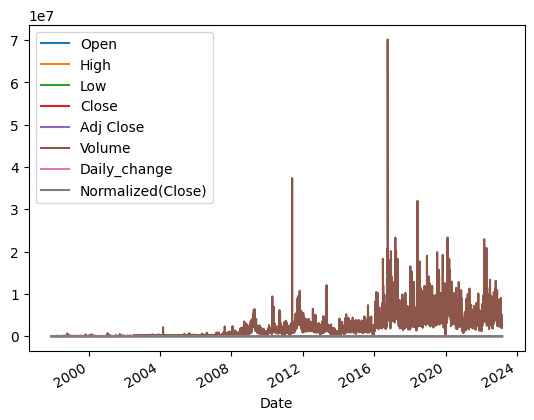

In [66]:
# here we use pandas plot function.
dbbank_df1.plot()
plt.show()

But for better control over the axis levels, legends, title, we will use matplotlib axis class.

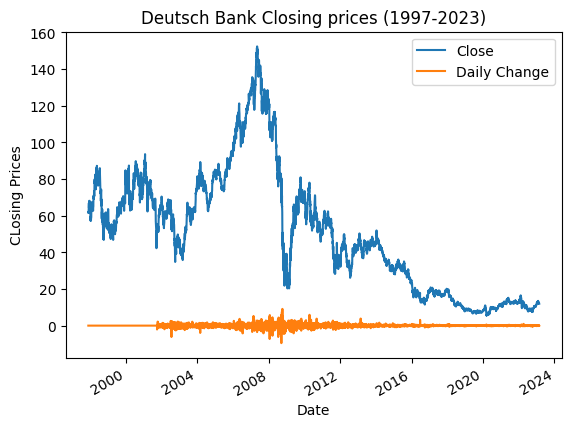

In [92]:
fig, ax = plt.subplots()
dbbank_df1['Close'].plot(ax=ax)
dbbank_df1['Daily_change'].plot(ax=ax)
ax.set_ylabel("CLosing Prices")
ax.set_title('Deutsch Bank Closing prices (1997-2023)')
ax.legend(['Close', 'Daily Change']) # set legend labels
plt.show()

SO what we find here is that, matplotlib here don't understand that Date is here not a column but a index column. 

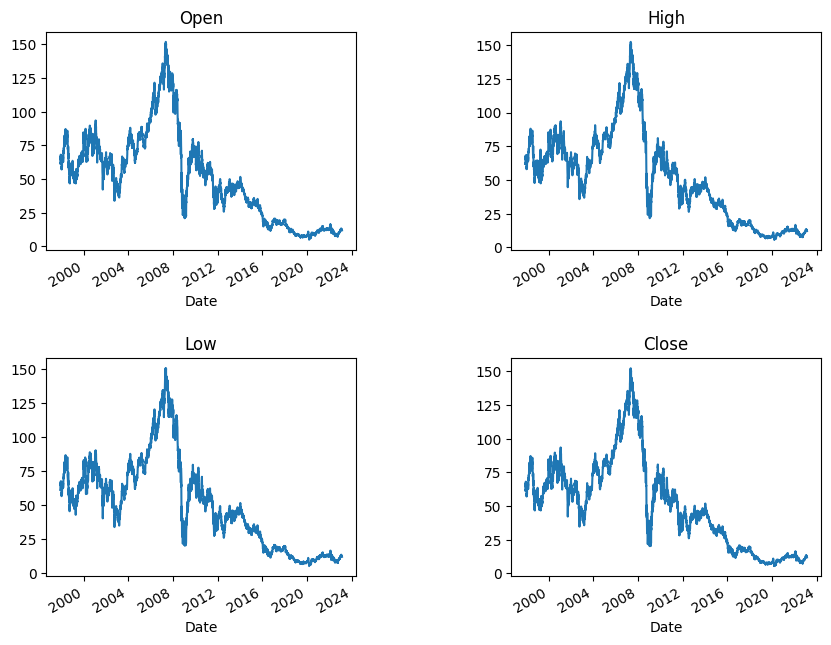

In [72]:
# For duration 1996-2023
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
dbbank_df1['Open'].plot(ax=ax[0,0], title= 'Open') # type: ignore
dbbank_df1['High'].plot(ax=ax[0,1], title= 'High') # type: ignore
dbbank_df1['Low'].plot(ax=ax[1,0], title= 'Low') # type: ignore
dbbank_df1['Close'].plot(ax=ax[1,1], title= 'Close') # type: ignore
# Adjust spacing between subplots
fig.subplots_adjust(wspace=0.5, hspace=0.5)

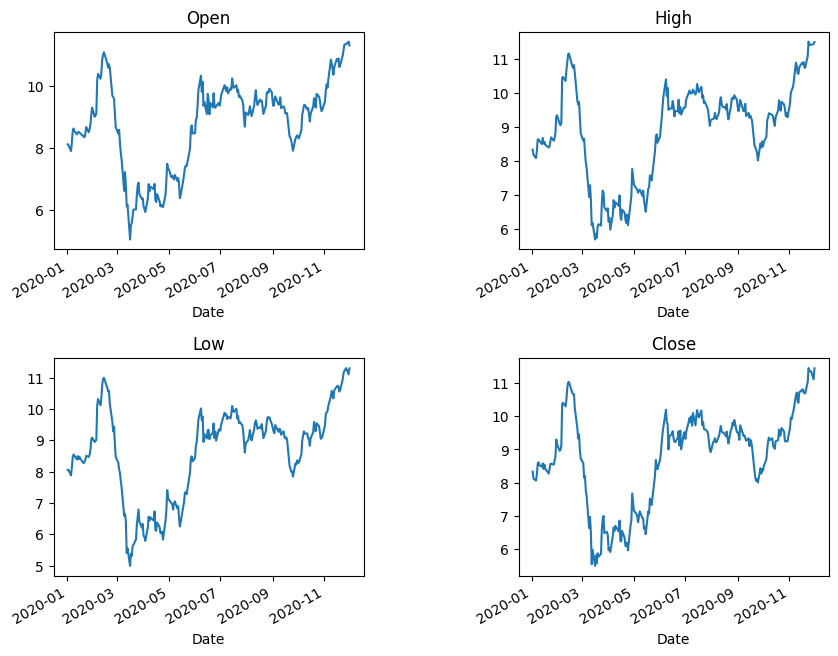

In [75]:
# For duration Jan 2020 - Dec 2020
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
dbbank_df1['Open'].loc['2020-01-01':'2020-12-01'].plot(ax=ax[0,0], title= 'Open') # type: ignore
dbbank_df1['High'].loc['2020-01-01':'2020-12-01'].plot(ax=ax[0,1], title= 'High') # type: ignore
dbbank_df1['Low'].loc['2020-01-01':'2020-12-01'].plot(ax=ax[1,0], title= 'Low') # type: ignore
dbbank_df1['Close'].loc['2020-01-01':'2020-12-01'].plot(ax=ax[1,1], title= 'Close') # type: ignore
# Adjust spacing between subplots
fig.subplots_adjust(wspace=0.5, hspace=0.5)

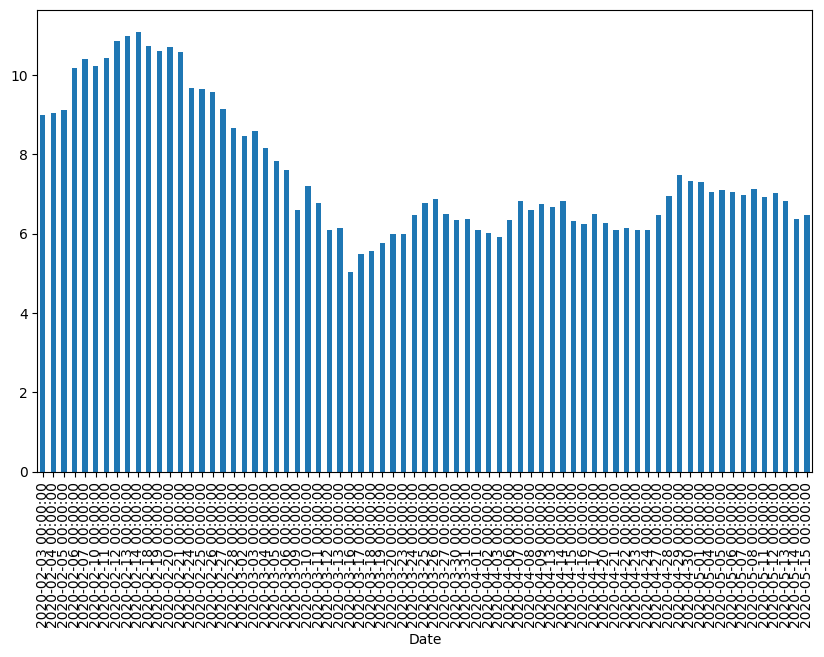

In [112]:
# Bar plot
fig, ax = plt.subplots(figsize=(10,6))
dbbank_df1['Open'].loc['2020-02-01':'2020-05-15'].plot.bar(ax=ax)
plt.show()

##### 2.1. Closing price (yearwise)

Now we need to change the 'Date' column from index to a regular column. To do this, we can use the `reset_index()`.

In [98]:
dbbank_df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_change,Normalized(Close)
0,1997-11-28,61.784351,62.022900,61.068703,61.784351,45.205997,4506,0.0,1.000000
1,1997-12-01,62.142178,62.380726,61.426525,62.142178,45.467808,1258,0.0,1.005792
2,1997-12-02,61.426525,62.142178,61.426525,61.426525,44.944183,2410,0.0,0.994208
3,1997-12-03,61.426525,61.903625,61.307251,61.426525,44.944183,1153,0.0,0.994208
4,1997-12-04,62.261452,62.738548,62.022900,62.261452,45.555077,1991,0.0,1.007722


In [105]:
dbbank_df2 = dbbank_df1.copy()
dbbank_df2 = dbbank_df2.reset_index()

In [106]:
dbbank_df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_change,Normalized(Close)
0,1997-11-28,61.784351,62.022900,61.068703,61.784351,45.205997,4506,0.0,1.000000
1,1997-12-01,62.142178,62.380726,61.426525,62.142178,45.467808,1258,0.0,1.005792
2,1997-12-02,61.426525,62.142178,61.426525,61.426525,44.944183,2410,0.0,0.994208
3,1997-12-03,61.426525,61.903625,61.307251,61.426525,44.944183,1153,0.0,0.994208
4,1997-12-04,62.261452,62.738548,62.022900,62.261452,45.555077,1991,0.0,1.007722


In [107]:
# Finding the data for 2022
# Convert the 'Date' column to datetime format
dbbank_df2['Date'] = pd.to_datetime(dbbank_df2['Date'])
dbbank_df2022 = dbbank_df2[dbbank_df2['Date'].dt.year == 2022]
dbbank_df2022.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_change,Normalized(Close)
6063,2022-01-03,12.72,12.86,12.71,12.82,12.550907,3077700,-0.099999,0.207496
6064,2022-01-04,13.17,13.28,13.15,13.22,12.942512,3269200,-0.050000,0.213970
6065,2022-01-05,13.45,13.52,13.17,13.17,12.893560,3990500,0.280000,0.213161
6066,2022-01-06,13.78,13.90,13.61,13.84,13.549498,6002900,-0.060000,0.224005
6067,2022-01-07,13.98,14.12,13.94,14.09,13.794250,3620900,-0.110001,0.228051


In [108]:
# Finding the data for 2021
dbbank_df2021 = dbbank_df2[dbbank_df2['Date'].dt.year == 2021]
dbbank_df2021.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_change,Normalized(Close)
5811,2021-01-04,10.89,10.97,10.68,10.74,10.514566,2363000,0.150001,0.173830
5812,2021-01-05,10.84,10.99,10.81,10.94,10.710368,2260100,-0.099999,0.177067
5813,2021-01-06,11.34,11.62,11.32,11.53,11.287984,4083500,-0.190000,0.186617
5814,2021-01-07,11.56,11.76,11.55,11.68,11.434836,2812600,-0.120000,0.189045
5815,2021-01-08,11.82,11.82,11.52,11.66,11.415256,2706700,0.160000,0.188721


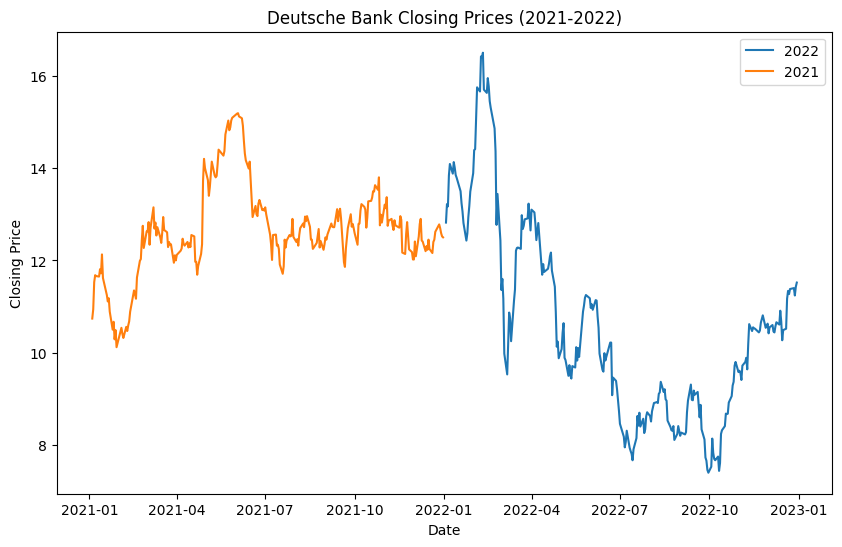

In [111]:
# plot the closing price 2021 and 2022 together
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(dbbank_df2022['Date'], dbbank_df2022['Close'], label='2022')
plt.plot(dbbank_df2021['Date'], dbbank_df2021['Close'], label='2021')
plt.title('Deutsche Bank Closing Prices (2021-2022)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

##### 2.2. Calculate returns

In [121]:
dbbank_df3  = dbbank_df1.copy()
dbbank_df3

,Open,High,Low,Close,Adj Close,Volume,Daily_change,Normalized(Close)
Date,,,,,,,,
1997-11-28,61.784351,62.022900,61.068703,61.784351,45.205997,4506,0.000000,1.000000
1997-12-01,62.142178,62.380726,61.426525,62.142178,45.467808,1258,0.000000,1.005792
1997-12-02,61.426525,62.142178,61.426525,61.426525,44.944183,2410,0.000000,0.994208
1997-12-03,61.426525,61.903625,61.307251,61.426525,44.944183,1153,0.000000,0.994208
1997-12-04,62.261452,62.738548,62.022900,62.261452,45.555077,1991,0.000000,1.007722
...,...,...,...,...,...,...,...,...
2023-02-17,12.610000,12.720000,12.580000,12.720000,12.720000,3250900,-0.110001,0.205877
2023-02-21,12.330000,12.440000,12.220000,12.280000,12.280000,3223200,0.050000,0.198756
2023-02-22,12.140000,12.230000,12.050000,12.180000,12.180000,2211000,-0.040000,0.197137


In [122]:
# Adding a %-change column to the dataframe
dbbank_df3['%-change(Close)'] = dbbank_df3['Close'].pct_change()
dbbank_df3.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_change,Normalized(Close),%-change(Close)
Date,,,,,,,,,
1997-11-28,61.784351,62.022900,61.068703,61.784351,45.205997,4506,0.0,1.000000,NaN
1997-12-01,62.142178,62.380726,61.426525,62.142178,45.467808,1258,0.0,1.005792,0.005792
1997-12-02,61.426525,62.142178,61.426525,61.426525,44.944183,2410,0.0,0.994208,-0.011516
1997-12-03,61.426525,61.903625,61.307251,61.426525,44.944183,1153,0.0,0.994208,0.000000
1997-12-04,62.261452,62.738548,62.022900,62.261452,45.555077,1991,0.0,1.007722,0.013592


In [126]:
# calculate daily returns
dbbank_df3['Return'] = dbbank_df3['Close'].pct_change()
dbbank_df3.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_change,Normalized(Close),%-change(Close),Return
Date,,,,,,,,,,
1997-11-28,61.784351,62.022900,61.068703,61.784351,45.205997,4506,0.0,1.000000,NaN,NaN
1997-12-01,62.142178,62.380726,61.426525,62.142178,45.467808,1258,0.0,1.005792,0.005792,0.005792
1997-12-02,61.426525,62.142178,61.426525,61.426525,44.944183,2410,0.0,0.994208,-0.011516,-0.011516
1997-12-03,61.426525,61.903625,61.307251,61.426525,44.944183,1153,0.0,0.994208,0.000000,0.000000
1997-12-04,62.261452,62.738548,62.022900,62.261452,45.555077,1991,0.0,1.007722,0.013592,0.013592


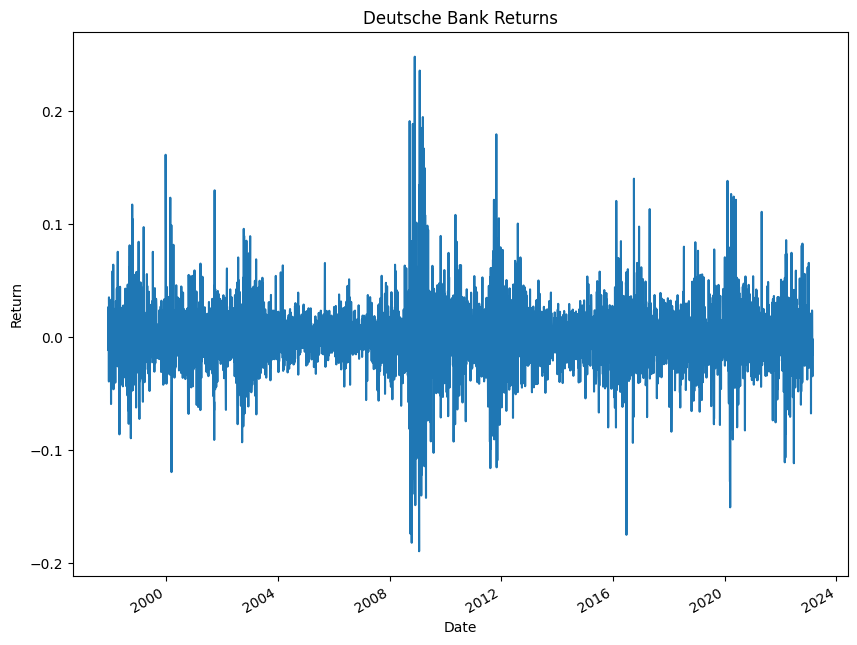

In [130]:
# plot the returns over time
dbbank_df3['Return'].plot(title='Deutsche Bank Returns', xlabel='Date', ylabel='Return', figsize = (10, 8))
plt.show()

In the case of the `dbbank_df['Return']` column, `pct_change()` is applied to the `Close` column of the DataFrame, which contains the closing prices of Deutsche Bank's stock. The resulting `Return` column contains the daily percentage changes in the stock price.

If you want to specify a window for the calculation of returns, you can use the `rolling()` function provided by pandas (discussed below). For example, to calculate the 10-day rolling average of daily returns, you can modify the first line of the code as follows:

In [126]:
dbbank_df['Close'].pct_change().rolling(10).mean()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
6346    0.002446
6347    0.000677
6348   -0.002265
6349   -0.002990
6350   -0.004075
Name: Close, Length: 6351, dtype: float64

If we want to see the 

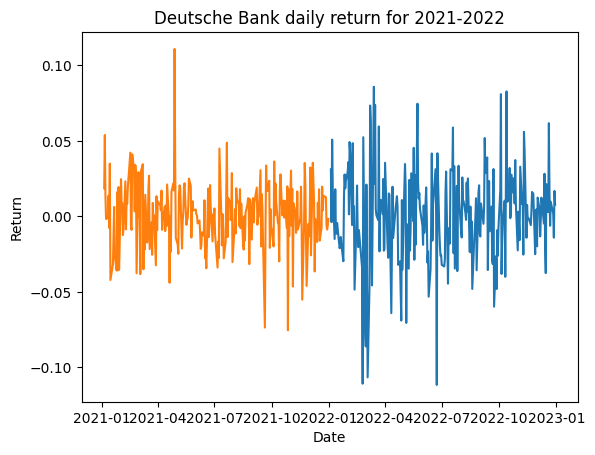

In [131]:
# plot the closing price 2021 and 2022 together
plt.plot(dbbank_df2022['Date'], dbbank_df2022['Close'].pct_change())
plt.plot(dbbank_df2021['Date'], dbbank_df2021['Close'].pct_change())
plt.title('Deutsche Bank daily return for 2021-2022')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

Calculating current close and previous closing value

In [132]:
dbbank_df3.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily_change,Normalized(Close),%-change(Close),Return
Date,,,,,,,,,,
2023-02-17,12.61,12.72,12.58,12.72,12.72,3250900,-0.110001,0.205877,0.011933,0.011933
2023-02-21,12.33,12.44,12.22,12.28,12.28,3223200,0.050000,0.198756,-0.034591,-0.034591
2023-02-22,12.14,12.23,12.05,12.18,12.18,2211000,-0.040000,0.197137,-0.008143,-0.008143
2023-02-23,12.21,12.24,12.08,12.16,12.16,2274500,0.050000,0.196814,-0.001642,-0.001642
2023-02-24,11.97,12.03,11.89,11.97,11.97,2870300,0.000000,0.193738,-0.015625,-0.015625


In [133]:
# Retrieve the current close and previous closing value
current_close = dbbank_df3['Close'].iloc[-1]
previous_close = dbbank_df3['Close'].iloc[-2]

# Print the values
print("Current Close:", current_close)
print("Previous Close:", previous_close)
print("5 Day Back closing Price :",dbbank_df['Close'].iloc[-6])

Current Close: 11.970000267028809
Previous Close: 12.15999984741211
5 Day Back closing Price : 12.569999694824219


In this code, we are first selecting the `Close` column from the dataframe using `df['Close']`. We then use the iloc function to select the last row (`iloc[-1]`) and second last row (`iloc[-2]`) from this column to get the current and previous closing values respectively. Finally, we print the values using the `print()` function.

##### 2.3. Volatility 

In finance, volatility refers to the degree of variation of a financial instrument's price over time. It is often measured as the standard deviation of the instrument's returns over a specific time period. The formula for calculating volatility is as follows:

$\text{volatility} = \sqrt{\frac{\sum{(R_i - R_{\rm avg})^2}}{(n-1)}}$

Where:

- $R_i$ is the return for a given day or time period
- $R_{\rm avg}$ is the average return over the same period
- $n$ is the number of days or time periods being analyzed

The formula can be simplified as follows:

`volatility = sqrt(variance)`

Where:

- variance is the average of the squared differences between each day's return and the average return over the same period.

In practice, the volatility of a financial instrument is usually calculated using historical data, and may be annualized or adjusted for other factors such as risk-free rates or dividends.

In summary, volatility is standard deviation.

**Standard Deviation:**

- $\sigma_p=\sigma_{\rm daily}\times \sqrt{p}$
- $\sigma_{\rm annualy} = \sigma_{\rm daily}\times \sqrt{252}$ (here 252 trading days per year).

In [135]:
dbbank_df3['Log Return'] = np.log(dbbank_df3['Close']/dbbank_df3['Close'].shift())
dbbank_df3.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_change,Normalized(Close),%-change(Close),Return,Log Return
Date,,,,,,,,,,,
1997-11-28,61.784351,62.022900,61.068703,61.784351,45.205997,4506,0.0,1.000000,NaN,NaN,NaN
1997-12-01,62.142178,62.380726,61.426525,62.142178,45.467808,1258,0.0,1.005792,0.005792,0.005792,0.005775
1997-12-02,61.426525,62.142178,61.426525,61.426525,44.944183,2410,0.0,0.994208,-0.011516,-0.011516,-0.011583
1997-12-03,61.426525,61.903625,61.307251,61.426525,44.944183,1153,0.0,0.994208,0.000000,0.000000,0.000000
1997-12-04,62.261452,62.738548,62.022900,62.261452,45.555077,1991,0.0,1.007722,0.013592,0.013592,0.013501


This line of code is calculating the logarithmic returns of the `Close` price column in the `dbbank_df` DataFrame.

The formula used to calculate logarithmic returns is:

$\text{log(Return)}= \text{log}(\frac{P_t}{P_{(t-1)}})$

where $P_t$ is the current price and $P_{(t-1)}$ is the previous price.

In this code, we're dividing the current 'Close' price by the previous 'Close' price using the `.shift()` method (here it shift the row one down in close column), and then taking the logarithm of that ratio using the `np.log()` function. This gives us the logarithmic return for each trading day.

The calculated logarithmic returns are being stored in a new column called 'Log Return' in the 'dbbank_df' DataFrame.

In [136]:
# standard deviation (daily)
dbbank_df3['Log Return'].std()

0.027534647435033012

Annual Volatility: $\sigma_{\rm annualy} = \sigma_{\rm daily}\times \sqrt{252}$

In [137]:
Voltility = dbbank_df3['Log Return'].std()*252**.5
Voltility

0.4370989773056392

In [138]:
str_vol = str(round(Voltility, 2)*100)

str_vol

'44.0'

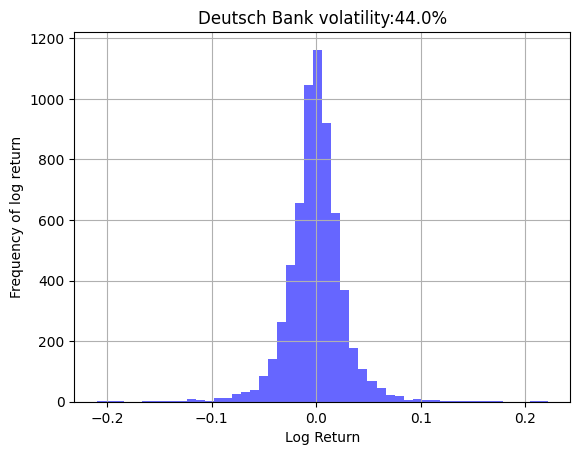

In [139]:
fig, ax = plt.subplots()
dbbank_df3['Log Return'].hist(ax=ax, bins = 50, alpha=0.6, color ='b')
ax.set_xlabel('Log Return')
ax.set_ylabel('Frequency of log return')
ax.set_title("Deutsch Bank volatility:" + str_vol + "%")
plt.show()

##### 2.4. Rolling statistics
You can use pandas to calculate rolling statistics such as rolling mean, rolling standard deviation, and rolling correlation.

- Rolling average
- Rolling standard deviation
- Rolling correlation

In [140]:
dbbank_df3.head(3)

,Open,High,Low,Close,Adj Close,Volume,Daily_change,Normalized(Close),%-change(Close),Return,Log Return
Date,,,,,,,,,,,
1997-11-28,61.784351,62.022900,61.068703,61.784351,45.205997,4506,0.0,1.000000,NaN,NaN,NaN
1997-12-01,62.142178,62.380726,61.426525,62.142178,45.467808,1258,0.0,1.005792,0.005792,0.005792,0.005775
1997-12-02,61.426525,62.142178,61.426525,61.426525,44.944183,2410,0.0,0.994208,-0.011516,-0.011516,-0.011583


In [141]:
# Calculate rolling mean with window size 30
dbbank_df3['MA10'] = dbbank_df3['Close'].rolling(window=10).mean()

In [142]:
# Exponential Moving Average
dbbank_df3['EMA10'] = dbbank_df3['Close'].ewm(span=10, adjust= False).mean()
dbbank_df3.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_change,Normalized(Close),%-change(Close),Return,Log Return,MA10,EMA10
Date,,,,,,,,,,,,,
1997-11-28,61.784351,62.022900,61.068703,61.784351,45.205997,4506,0.0,1.000000,NaN,NaN,NaN,NaN,61.784351
1997-12-01,62.142178,62.380726,61.426525,62.142178,45.467808,1258,0.0,1.005792,0.005792,0.005792,0.005775,NaN,61.849411
1997-12-02,61.426525,62.142178,61.426525,61.426525,44.944183,2410,0.0,0.994208,-0.011516,-0.011516,-0.011583,NaN,61.772522
1997-12-03,61.426525,61.903625,61.307251,61.426525,44.944183,1153,0.0,0.994208,0.000000,0.000000,0.000000,NaN,61.709614
1997-12-04,62.261452,62.738548,62.022900,62.261452,45.555077,1991,0.0,1.007722,0.013592,0.013592,0.013501,NaN,61.809948


In [145]:
dbbank_df3.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_change,Normalized(Close),%-change(Close),Return,Log Return,MA10,EMA10
Date,,,,,,,,,,,,,
1997-11-28,61.784351,62.022900,61.068703,61.784351,45.205997,4506,0.0,1.000000,NaN,NaN,NaN,NaN,61.784351
1997-12-01,62.142178,62.380726,61.426525,62.142178,45.467808,1258,0.0,1.005792,0.005792,0.005792,0.005775,NaN,61.849411
1997-12-02,61.426525,62.142178,61.426525,61.426525,44.944183,2410,0.0,0.994208,-0.011516,-0.011516,-0.011583,NaN,61.772522
1997-12-03,61.426525,61.903625,61.307251,61.426525,44.944183,1153,0.0,0.994208,0.000000,0.000000,0.000000,NaN,61.709614
1997-12-04,62.261452,62.738548,62.022900,62.261452,45.555077,1991,0.0,1.007722,0.013592,0.013592,0.013501,NaN,61.809948


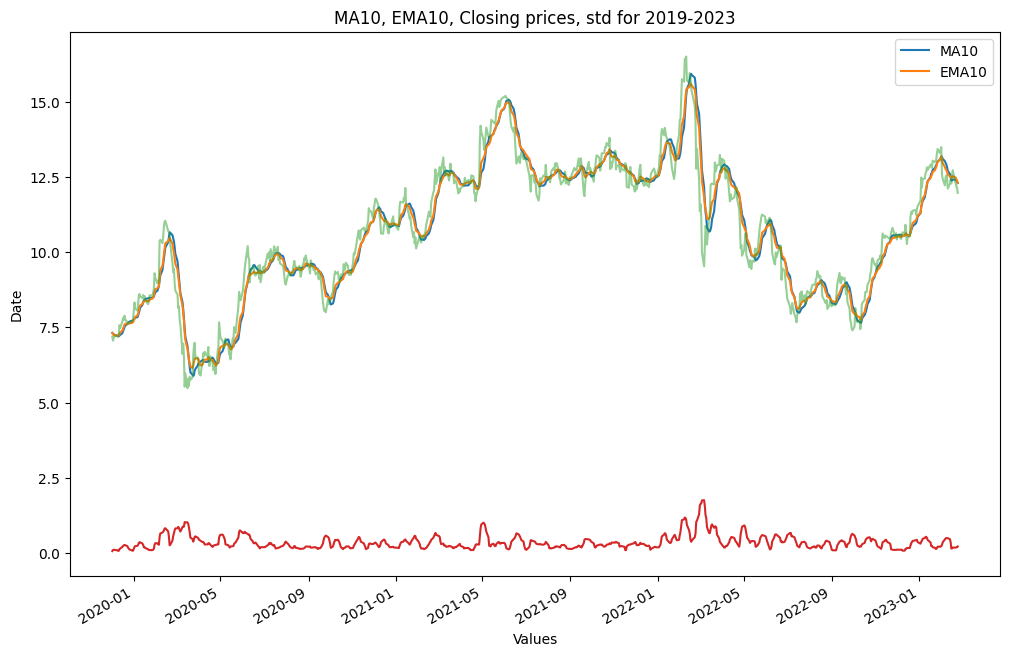

In [148]:
fig, ax = plt.subplots(figsize=(12,8))
dbbank_df3[['MA10', 'EMA10']].loc['2019-12-01':].plot(ax=ax)
dbbank_df3['Close'].loc['2019-12-01':].plot(ax=ax, alpha=0.5)
# Calculate rolling standard deviation with window size 10 and then plotting
dbbank_df3['Close'].rolling(window=10).std().loc['2019-12-01':].plot()
ax.set_xlabel('Values')
ax.set_ylabel('Date')
ax.set_title("MA10, EMA10, Closing prices, std for 2019-2023")
plt.show()

##### 2.5. Moving average convergence divergence (MACD)

- MACD is a lagging indicator when trading on the crossovers
- https://www.investopedia.com/terms/m/macd.asp

Calculation: 

- MACD = 12-period EMA - 26-Period EMA
- Signal line 9-period EMA of MACD

We can use pandas to calculate the MACD, a popular technical indicator used in trading.

In [149]:
dbbank_df3.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily_change',
       'Normalized(Close)', '%-change(Close)', 'Return', 'Log Return', 'MA10',
       'EMA10'],
      dtype='object')

In [154]:
dbbank_df4 = dbbank_df.copy()
dbbank_df4.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-11-28,61.784351,62.022900,61.068703,61.784351,45.205997,4506
1997-12-01,62.142178,62.380726,61.426525,62.142178,45.467808,1258
1997-12-02,61.426525,62.142178,61.426525,61.426525,44.944183,2410
1997-12-03,61.426525,61.903625,61.307251,61.426525,44.944183,1153
1997-12-04,62.261452,62.738548,62.022900,62.261452,45.555077,1991


In [144]:
#dbbank_df.index.name = None

In [145]:
#print(dbbank_df.index.name)

In [146]:
#dbbank_dfcopy.head()

In [155]:
exp1 = dbbank_df4['Close'].ewm(span=12, adjust= False).mean()
exp2 = dbbank_df4['Close'].ewm(span=26, adjust= False).mean()
dbbank_df4['MACD'] = exp1-exp2
dbbank_df4['Signal line'] = dbbank_df4['MACD'].ewm(span=9, adjust = False).mean()

In [156]:
dbbank_df4.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line
Date,,,,,,,,
2023-02-17,12.61,12.72,12.58,12.72,12.72,3250900,0.046480,0.121212
2023-02-21,12.33,12.44,12.22,12.28,12.28,3223200,0.022351,0.101440
2023-02-22,12.14,12.23,12.05,12.18,12.18,2211000,-0.004786,0.080195
2023-02-23,12.21,12.24,12.08,12.16,12.16,2274500,-0.027587,0.058638
2023-02-24,11.97,12.03,11.89,11.97,11.97,2870300,-0.060294,0.034852


Text(0, 0.5, 'Close Price')

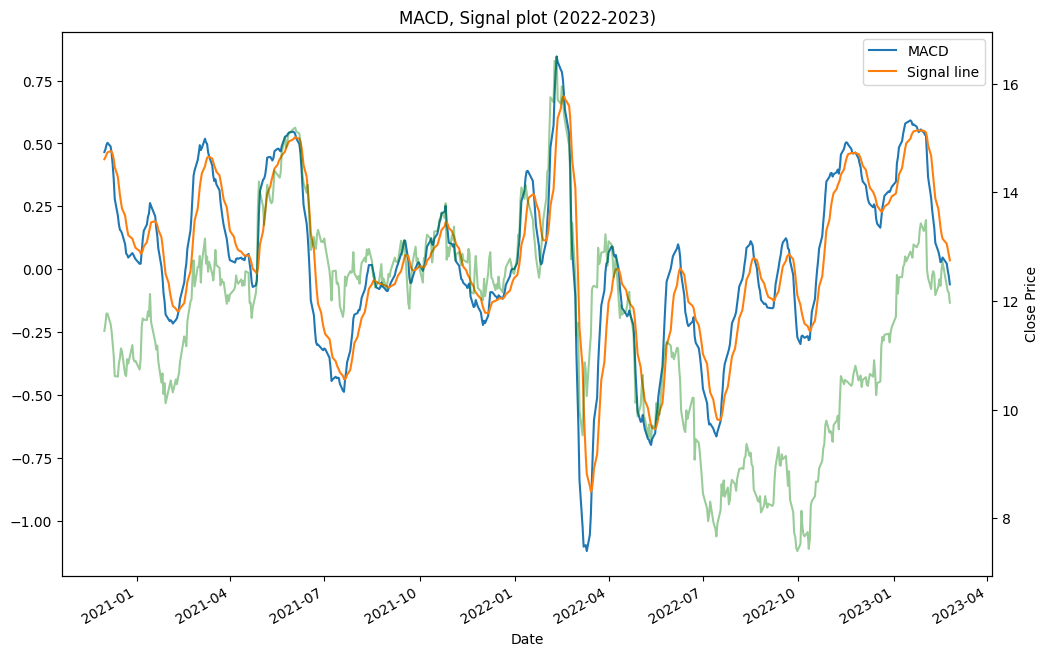

In [162]:
# Now lets plot it for the duration of 2020-2023
fig, ax = plt.subplots(figsize=(12,8))
dbbank_df4[['MACD', 'Signal line']].loc['2020-12-01':].plot(ax=ax)
dbbank_df4['Close'].loc['2020-12-01':].plot(ax=ax, color= 'g', alpha=0.4, secondary_y= True)
ax.set_xlabel('Date')
# ax.set_ylabel('MACD & Signal line')
ax.set_title('MACD, Signal plot (2022-2023)')
ax.right_ax.set_ylabel('Close Price')

So what we see here that when the  blue line is above thr orange line, it is a buy or keep signal and when blue line is below orange line, it's sell. So we actually see that the MACD is quite reactive for the sell/keep the signals. 

##### 2.6. Stochastic oscillator

- Lagging indicator
- https://www.investopedia.com/terms/s/stochasticoscillator.asp

Calculation: 
- 14-high: Maximum of last 14 trading days.
- 14-low: Minimum of last 14 trading days.
- %K: (Last close-14-low)*100/(14-high - 14-low)
- %D: Simple Moving Average of %K.

In [163]:
high14 = dbbank_df4['High'].rolling(14).max()
low14 = dbbank_df4['Low'].rolling(14).min()
dbbank_df4['%K'] = (dbbank_df4['Close']-low14)*100/(high14-low14)
dbbank_df4['%D'] = dbbank_df4['%K'].rolling(3).mean() # check the rolling window,

In [172]:
dbbank_df4.head()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line,%K,%D
Date,,,,,,,,,,
1997-11-28,61.784351,62.022900,61.068703,61.784351,45.205997,4506,0.000000,0.000000,NaN,NaN
1997-12-01,62.142178,62.380726,61.426525,62.142178,45.467808,1258,0.028545,0.005709,NaN,NaN
1997-12-02,61.426525,62.142178,61.426525,61.426525,44.944183,2410,-0.006506,0.003266,NaN,NaN
1997-12-03,61.426525,61.903625,61.307251,61.426525,44.944183,1153,-0.033893,-0.004166,NaN,NaN
1997-12-04,62.261452,62.738548,62.022900,62.261452,45.555077,1991,0.011640,-0.001005,NaN,NaN


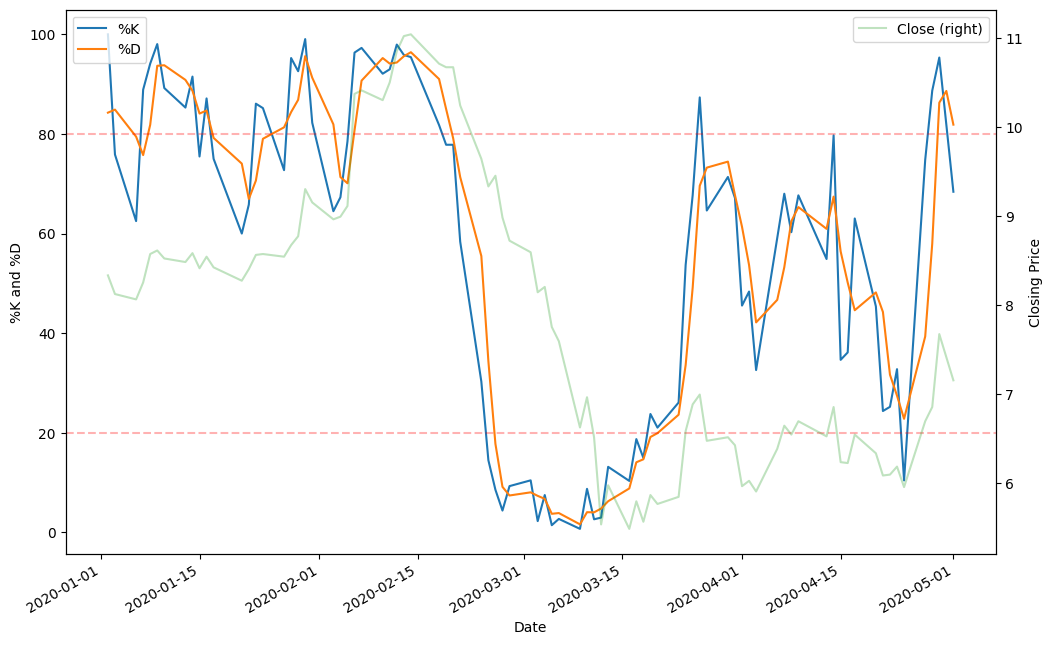

In [190]:
fig, ax = plt.subplots(figsize=(12,8))
dbbank_df4[['%K', '%D']].loc['2020-01-01':'2020-05-01'].plot(ax=ax, label=['%K', '%D'])
ax.axhline(80, c='r', alpha=0.3, linestyle='--')
ax.axhline(20, c='r', alpha=0.3, linestyle='--')
dbbank_df4['Close'].loc['2020-01-01':'2020-05-01'].plot(ax=ax, alpha=0.3, secondary_y=True, label='Close')
ax.set_xlabel('Date')
ax.set_ylabel('%K and %D')
ax.right_ax.set_ylabel('Closing Price')
ax.right_ax.legend(loc='upper right')
ax.legend(loc='upper left')
plt.show() 

When the blue and orange lines are above the red daashed line (set at 80), it indicates over bought share. However, when it is below red dashed line set at 20, then stock is over sold. Whenever, the D line is lower than the K line and and at thee samme time Closing price is also less than 80 line, it indicates a sell order. 

##### 2.7. **Correlation:**

To calculate correlations, we need to calculate the shifted value.

> Shifting the rows in this case can be useful for calculating changes in the 'High' column values between consecutive time periods. By shifting the 'High' column one row downwards, you can compare each value with its previous value and calculate the change.

> For example, if you subtract the shifted 'High' column from the original 'High' column, you get a new column that contains the difference in 'High' values between each consecutive time period. This can be useful for calculating metrics like daily price changes or volatility.

> `dbbank_df['high_change'] = dbbank_df['High'] - dbbank_df['High'].shift()`

> In this code, the shift() method is used to shift the 'High' column one row downwards, so that each value in the 'High' column is now compared with its previous value. Note that the first value in the 'high_change' column will be `NaN`, as there is no previous value to subtract from the first row.

In [263]:
dbbank_df5 = dbbank_df.copy()

In [264]:
# Create another column with shifted values of 'value' column
dbbank_df5['shifted_high'] = dbbank_df5['High'].shift()
dbbank_df5['shifted_low'] = dbbank_df5['Low'].shift()
dbbank_df5['shifted_close'] = dbbank_df5['Close'].shift()

In [265]:
# Calculate rolling correlation with window size 10 for 2020-2023
rollinghigh_corr = dbbank_df5.loc['2020-01-01':]['High'].rolling(window=10).corr(dbbank_df5['shifted_high'])
rollinglow_corr = dbbank_df5.loc['2020-01-01':]['Low'].rolling(window=10).corr(dbbank_df5['shifted_low'])
rollingClose_corr = dbbank_df5.loc['2020-01-01':]['Close'].rolling(window=10).corr(dbbank_df5['shifted_close'])

In [266]:
dbbank_df5.head()

,Open,High,Low,Close,Adj Close,Volume,shifted_high,shifted_low,shifted_close
Date,,,,,,,,,
1997-11-28,61.784351,62.022900,61.068703,61.784351,45.205997,4506,NaN,NaN,NaN
1997-12-01,62.142178,62.380726,61.426525,62.142178,45.467808,1258,62.022900,61.068703,61.784351
1997-12-02,61.426525,62.142178,61.426525,61.426525,44.944183,2410,62.380726,61.426525,62.142178
1997-12-03,61.426525,61.903625,61.307251,61.426525,44.944183,1153,62.142178,61.426525,61.426525
1997-12-04,62.261452,62.738548,62.022900,62.261452,45.555077,1991,61.903625,61.307251,61.426525


In [267]:
rolling_mean30 = dbbank_df5.loc['2020-01-01':]['Close'].rolling(window=30).mean()
rolling_std30 = dbbank_df5.loc['2020-01-01':]['Close'].rolling(window=30).mean()

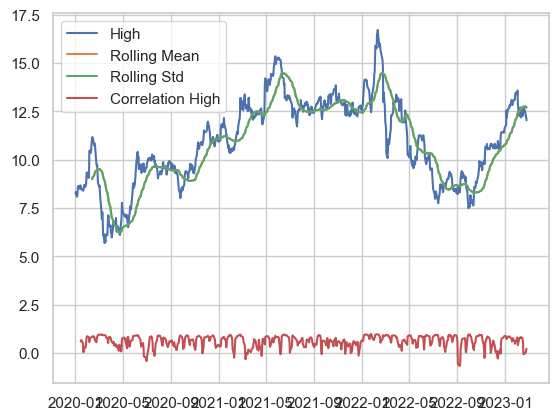

In [268]:
plt.plot(dbbank_df5.loc['2020-01-01':]['High'], label='High')
plt.plot(rolling_mean30, label='Rolling Mean')
plt.plot(rolling_std30, label='Rolling Std')
plt.plot(rollinghigh_corr, label='Correlation High')
plt.legend()
plt.show()

clearly, high value does not correlations show any correlation.

In [269]:
# Calculate rolling correlation with window size 10 for 2020-2023
rollinghigh_corr1 = dbbank_df5['High'].rolling(window=10).corr(dbbank_df5['shifted_high'])
rollinglow_corr1 = dbbank_df5['Low'].rolling(window=10).corr(dbbank_df5['shifted_low'])
rollingClose_corr1 = dbbank_df5['Close'].rolling(window=10).corr(dbbank_df5['shifted_close'])

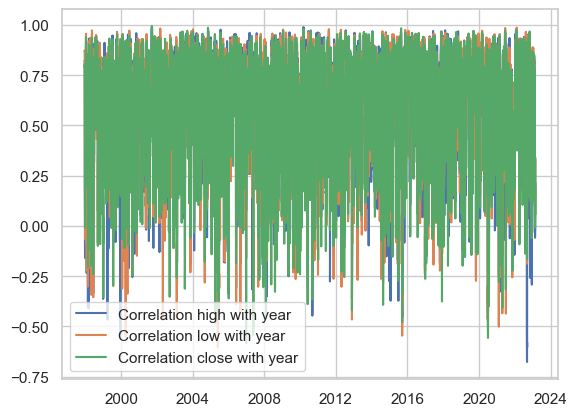

In [270]:
plt.plot(rollinghigh_corr1, label='Correlation high with year')
plt.plot(rollinglow_corr1, label='Correlation low with year')
plt.plot(rollingClose_corr1, label='Correlation close with year')
plt.legend()
plt.show()

##### 2.8. Bollinger Bands
You can use pandas to calculate Bollinger Bands, another popular technical indicator used in trading.

In [272]:
# calculate 20-day moving average and standard deviation
dbbank_df5['MA20'] = dbbank_df5['Close'].rolling(window=20).mean()
dbbank_df5['StdDev'] = dbbank_df5['Close'].rolling(window=20).std()
# calculate upper and lower Bollinger Bands
dbbank_df5['UpperBand'] = dbbank_df5['MA20'] + 2 * dbbank_df5['StdDev']
dbbank_df5['LowerBand'] = dbbank_df5['MA20'] - 2 * dbbank_df5['StdDev']

In [273]:
dbbank_df5.head()

,Open,High,Low,Close,Adj Close,Volume,shifted_high,shifted_low,shifted_close,MA20,StdDev,UpperBand,LowerBand
Date,,,,,,,,,,,,,
1997-11-28,61.784351,62.022900,61.068703,61.784351,45.205997,4506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-12-01,62.142178,62.380726,61.426525,62.142178,45.467808,1258,62.022900,61.068703,61.784351,NaN,NaN,NaN,NaN
1997-12-02,61.426525,62.142178,61.426525,61.426525,44.944183,2410,62.380726,61.426525,62.142178,NaN,NaN,NaN,NaN
1997-12-03,61.426525,61.903625,61.307251,61.426525,44.944183,1153,62.142178,61.426525,61.426525,NaN,NaN,NaN,NaN
1997-12-04,62.261452,62.738548,62.022900,62.261452,45.555077,1991,61.903625,61.307251,61.426525,NaN,NaN,NaN,NaN


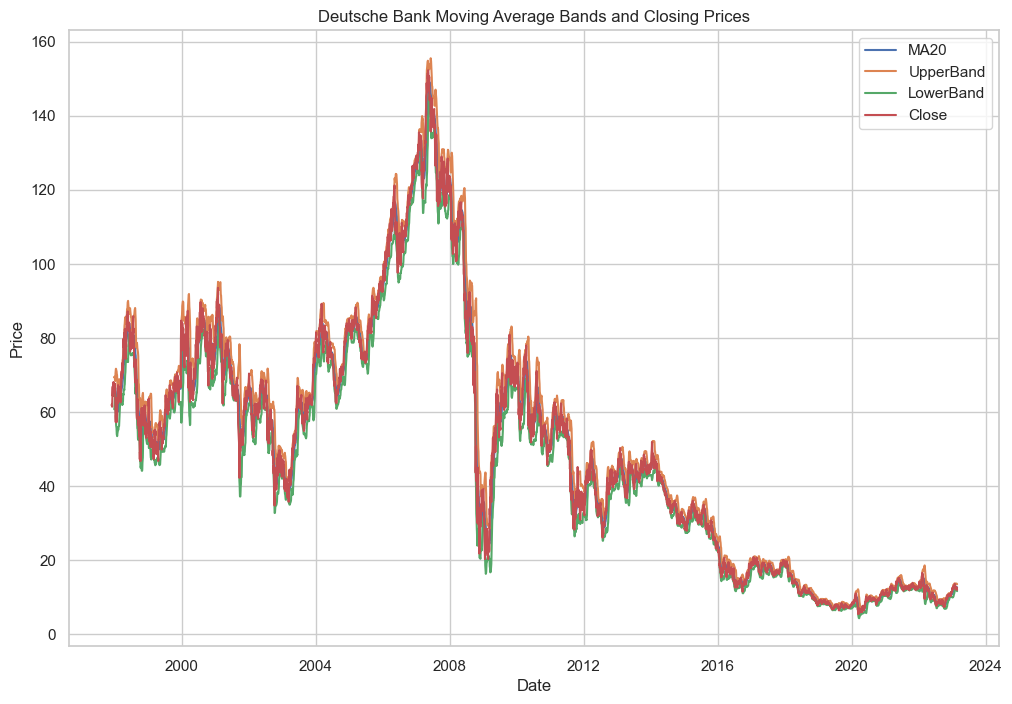

In [279]:
# create a figure and axis objects
fig, ax = plt.subplots(figsize=(12,8))

# plot the MA20, UpperBand, LowerBand and Close columns with respect to Date
ax.plot(dbbank_df5.index, dbbank_df5['MA20'], label='MA20')
ax.plot(dbbank_df5.index, dbbank_df5['UpperBand'], label='UpperBand')
ax.plot(dbbank_df5.index, dbbank_df5['LowerBand'], label='LowerBand')
ax.plot(dbbank_df5.index, dbbank_df5['Close'], label='Close')

# set title and labels
ax.set_title('Deutsche Bank Moving Average Bands and Closing Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

# set legend
ax.legend()

# display the plot
plt.show()

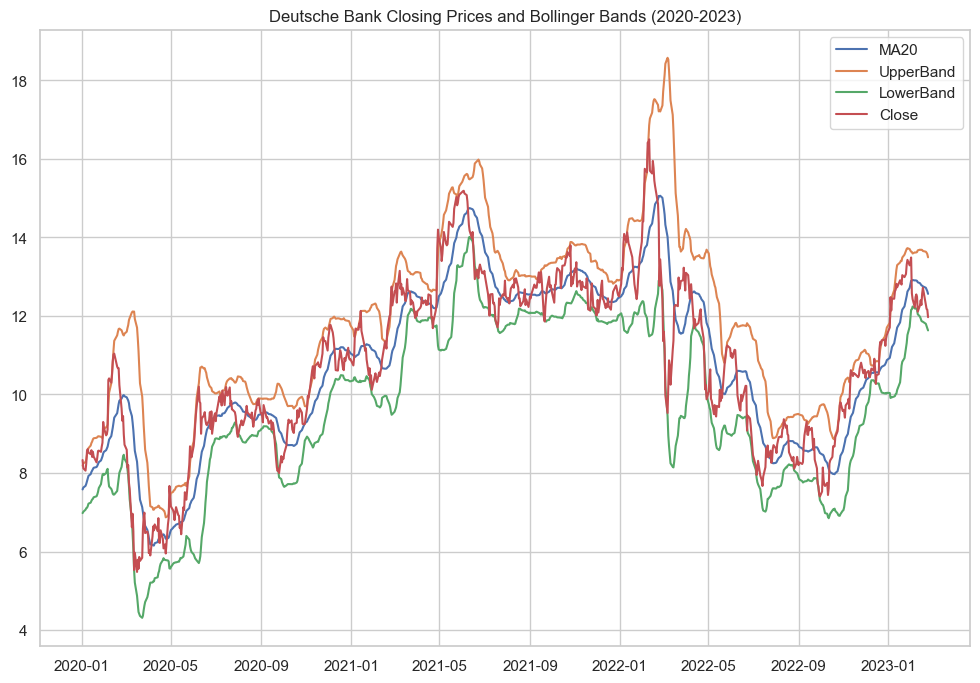

In [282]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))

# select rows between 2020-2023
dbbank_df5_2020_2023 = dbbank_df5.loc['2020':'2023']

# plot the selected data
ax.plot(dbbank_df5_2020_2023.index, dbbank_df5_2020_2023['MA20'], label='MA20')
ax.plot(dbbank_df5_2020_2023.index, dbbank_df5_2020_2023['UpperBand'], label='UpperBand', )
ax.plot(dbbank_df5_2020_2023.index, dbbank_df5_2020_2023['LowerBand'], label='LowerBand')
ax.plot(dbbank_df5_2020_2023.index, dbbank_df5_2020_2023['Close'], label='Close')

# set title and legend
ax.set_title('Deutsche Bank Closing Prices and Bollinger Bands (2020-2023)')
ax.legend()

plt.show()

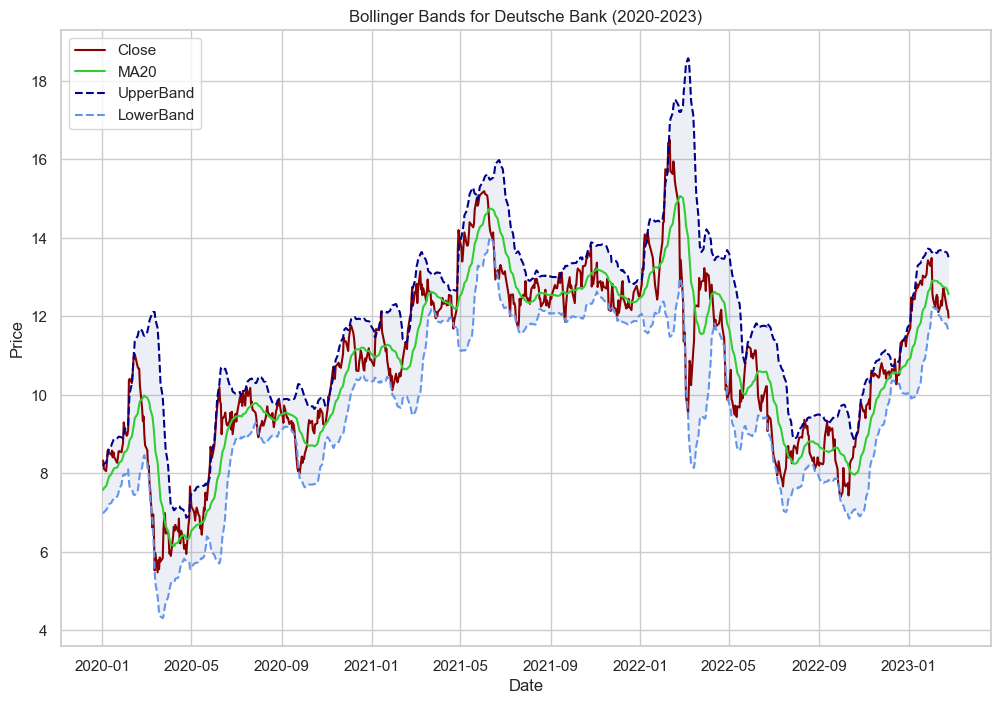

In [288]:
# now shading the area betweeen the Upper and the lower band.
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(dbbank_df5.loc['2020':'2023', 'Close'], color= 'darkred', label='Close')
ax.plot(dbbank_df5.loc['2020':'2023', 'MA20'], color='limegreen' ,label='MA20')
ax.plot(dbbank_df5.loc['2020':'2023', 'UpperBand'], color='darkblue', label='UpperBand', linestyle='--')
ax.plot(dbbank_df5.loc['2020':'2023', 'LowerBand'], color='cornflowerblue', label='LowerBand', linestyle='--')
ax.fill_between(dbbank_df5.loc['2020':'2023'].index, dbbank_df5.loc['2020':'2023', 'UpperBand'], dbbank_df5.loc['2020':'2023', 'LowerBand'], alpha=0.1)
ax.set_title('Bollinger Bands for Deutsche Bank (2020-2023)')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')
plt.show()

#### 3. Analyze relationships between variables
You can use seaborn to create scatter plots and regression plots to explore the relationships between variables. 

In [196]:
dbbank_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-11-28,61.784351,62.022900,61.068703,61.784351,45.205997,4506
1997-12-01,62.142178,62.380726,61.426525,62.142178,45.467808,1258
1997-12-02,61.426525,62.142178,61.426525,61.426525,44.944183,2410
1997-12-03,61.426525,61.903625,61.307251,61.426525,44.944183,1153
1997-12-04,62.261452,62.738548,62.022900,62.261452,45.555077,1991


In [192]:
dbbank_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_change,Normalized(Close)
Date,,,,,,,,
1997-11-28,61.784351,62.022900,61.068703,61.784351,45.205997,4506,0.0,1.000000
1997-12-01,62.142178,62.380726,61.426525,62.142178,45.467808,1258,0.0,1.005792
1997-12-02,61.426525,62.142178,61.426525,61.426525,44.944183,2410,0.0,0.994208
1997-12-03,61.426525,61.903625,61.307251,61.426525,44.944183,1153,0.0,0.994208
1997-12-04,62.261452,62.738548,62.022900,62.261452,45.555077,1991,0.0,1.007722


In [194]:
dbbank_df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_change,Normalized(Close)
0,1997-11-28,61.784351,62.022900,61.068703,61.784351,45.205997,4506,0.0,1.000000
1,1997-12-01,62.142178,62.380726,61.426525,62.142178,45.467808,1258,0.0,1.005792
2,1997-12-02,61.426525,62.142178,61.426525,61.426525,44.944183,2410,0.0,0.994208
3,1997-12-03,61.426525,61.903625,61.307251,61.426525,44.944183,1153,0.0,0.994208
4,1997-12-04,62.261452,62.738548,62.022900,62.261452,45.555077,1991,0.0,1.007722


In [195]:
dbbank_df3.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_change,Normalized(Close),%-change(Close),Return,Log Return,MA10,EMA10
Date,,,,,,,,,,,,,
1997-11-28,61.784351,62.022900,61.068703,61.784351,45.205997,4506,0.0,1.000000,NaN,NaN,NaN,NaN,61.784351
1997-12-01,62.142178,62.380726,61.426525,62.142178,45.467808,1258,0.0,1.005792,0.005792,0.005792,0.005775,NaN,61.849411
1997-12-02,61.426525,62.142178,61.426525,61.426525,44.944183,2410,0.0,0.994208,-0.011516,-0.011516,-0.011583,NaN,61.772522
1997-12-03,61.426525,61.903625,61.307251,61.426525,44.944183,1153,0.0,0.994208,0.000000,0.000000,0.000000,NaN,61.709614
1997-12-04,62.261452,62.738548,62.022900,62.261452,45.555077,1991,0.0,1.007722,0.013592,0.013592,0.013501,NaN,61.809948


In [191]:
dbbank_df4.head()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line,%K,%D
Date,,,,,,,,,,
1997-11-28,61.784351,62.022900,61.068703,61.784351,45.205997,4506,0.000000,0.000000,NaN,NaN
1997-12-01,62.142178,62.380726,61.426525,62.142178,45.467808,1258,0.028545,0.005709,NaN,NaN
1997-12-02,61.426525,62.142178,61.426525,61.426525,44.944183,2410,-0.006506,0.003266,NaN,NaN
1997-12-03,61.426525,61.903625,61.307251,61.426525,44.944183,1153,-0.033893,-0.004166,NaN,NaN
1997-12-04,62.261452,62.738548,62.022900,62.261452,45.555077,1991,0.011640,-0.001005,NaN,NaN


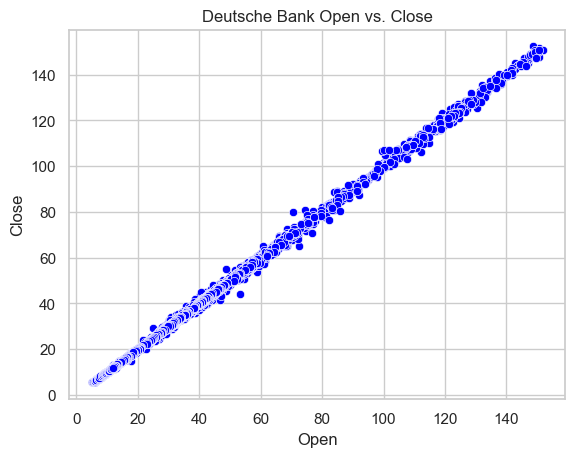

In [197]:
sns.set(style='whitegrid')
# create a scatter plot of Open vs. Close
sns.scatterplot(data=dbbank_df, x='Open', y='Close', color="blue")
plt.title('Deutsche Bank Open vs. Close')
plt.show()

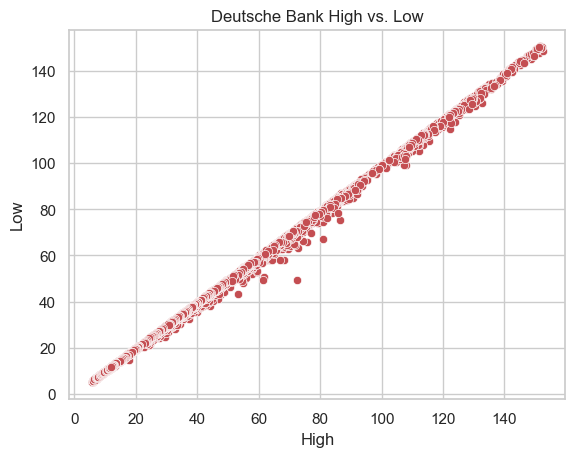

In [200]:
# create a scatter plot of Open vs. Close
sns.scatterplot(data=dbbank_df, x='High', y='Low', c='r')
plt.title('Deutsche Bank High vs. Low')
plt.show()

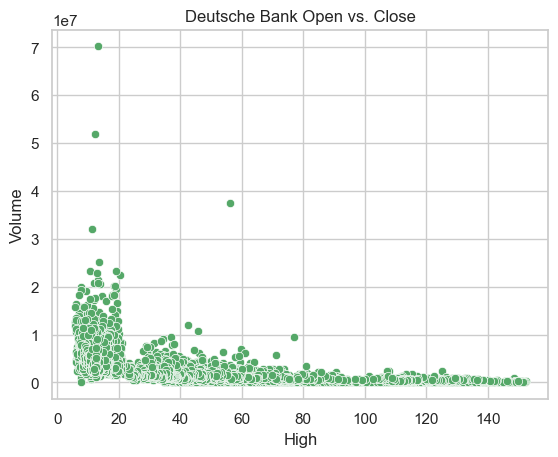

In [201]:
# create a scatter plot of Open vs. Close
sns.scatterplot(data=dbbank_df, x='High', y='Volume', color="g")
plt.title('Deutsche Bank Open vs. Close')
plt.show()

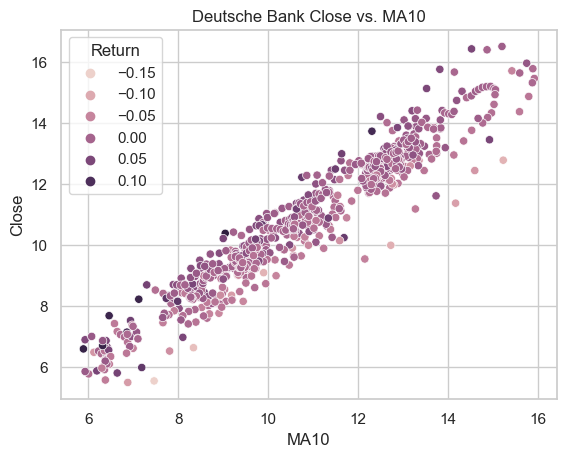

In [242]:
sns.set(style="whitegrid")
# create a scatter plot of Open vs. Close
sns.scatterplot(data=dbbank_df3.loc['2020-01-01':], x='MA10', y='Close', hue='Return')

plt.title('Deutsche Bank Close vs. MA10')
plt.show()

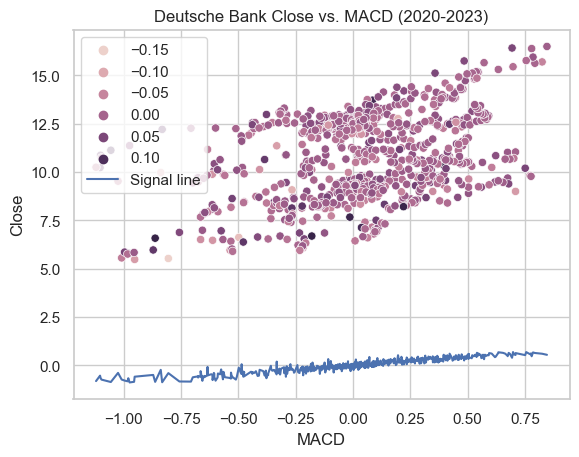

In [243]:
sns.set(style="whitegrid")
# create a scatter plot of Open vs. Close
sns.scatterplot(data=dbbank_df3.loc['2020-01-01':], x=dbbank_df4['MACD'], y='Close', hue='Return')
sns.lineplot(data=dbbank_df4.loc['2020-01-01':], x='MACD', y='Signal line', label='Signal line')
plt.title('Deutsche Bank Close vs. MACD (2020-2023)')
plt.show()

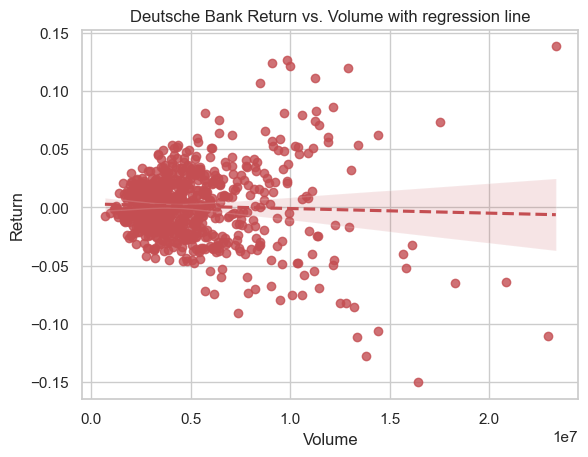

In [213]:
#Scatter Plot with Regression Line using Seaborn
sns.regplot(data=dbbank_df3.loc['2020-01-01':], y='Return', x='Volume', color = 'r', line_kws={"ls":"--"})
# Set title and labels
plt.title('Deutsche Bank Return vs. Volume with regression line')
plt.xlabel('Volume')
plt.ylabel('Return')

plt.show()

**Note:** Regression line: A regression line is an estimate of the line that describes the true, but unknown, linear relationship between the two variables.

Clearly the two variables doesnot show a strong relationship.

<AxesSubplot: xlabel='High', ylabel='Volume'>

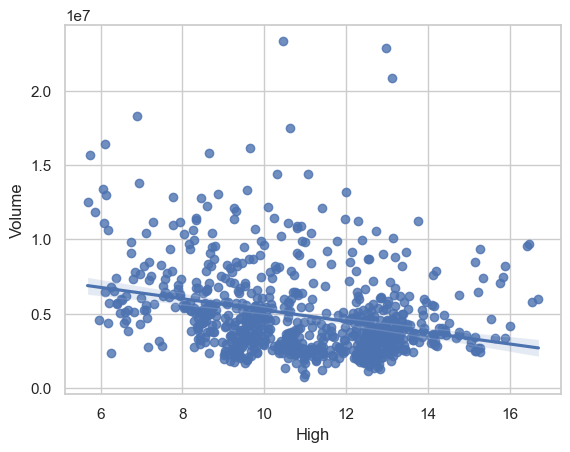

In [217]:
#Scatter Plot with Regression Line using Seaborn
sns.regplot(data=dbbank_df.loc['2020-01-01':], x='High', y='Volume')

In this case, we can say that, wheen volume is high, the share prices go high. 

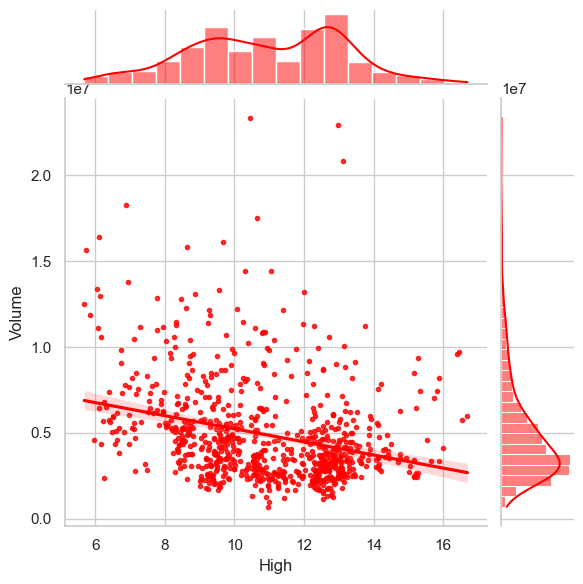

In [219]:
# Scatter Plot with Marginal Histograms along with linear regression
sns.jointplot(data=dbbank_df.loc['2020-01-01':], x='High', y='Volume', kind="reg", color='red', marker=".")

**Note:** 

*Marginal distribution:* The marginal distribution of a variable is the probability distribution of that variable alone, ignoring the values of any other variables. For two variables, the marginal distribution of one variable can be obtained by summing the joint probability distribution over all values of the other variable.

> For example, if X and Y are two random variables with joint probability distribution p(X, Y), the marginal distribution of X is given by p(X) = ∑p(X, Y), where the sum is taken over all possible values of Y. Similarly, the marginal distribution of Y can be obtained by summing the joint distribution over all values of X.

> It represents the bi-variate distribution using scatterplot() and the marginal distributions using histplot().

#### 8. Compare with market indices
You can use pandas to download and compare the Deutsche Bank share data with market indices such as the DAX, FTSE, or S&P 500. For example, to download the DAX data and compare it with the Deutsche Bank share data:

1. aapl_df = apple
2. bac_df = Bank of amerika
3. citi_df = citibank
4. gs_df = Goldman Sachs
5. jpm_df = JPMorgan
6. ms_df = morgan Stanlay

Columns:
Date	| Open	| High	| Low	| Close	| Adj Close	| Volume |

In [290]:
# Define tickers for the stocks of interest
tickers = ["AAPL", "BAC", "C", "GS", "JPM", "WFC"]

# Download data for the tickers
data = yf.download(tickers, start="2010-01-01")

# Print the data
data

[*********************100%***********************]  6 of 6 completed


Adj Close                                                \
                  AAPL        BAC          C          GS         JPM   
Date                                                                   
2010-01-04    6.505280  13.165425  27.860689  140.864304   30.517252   
2010-01-05    6.516528  13.593368  28.925943  143.354736   31.108355   
2010-01-06    6.412873  13.752792  29.827326  141.824722   31.279280   
2010-01-07    6.401018  14.205909  29.909256  144.599960   31.898891   
2010-01-08    6.443574  14.080039  29.417608  141.865341   31.820545   
...                ...        ...        ...         ...         ...   
2023-02-22  148.910004  34.290001  50.040001  360.890015  138.559998   
2023-02-23  149.399994  34.259998  50.380001  363.540009  139.669998   
2023-02-24  146.710007  34.209999  50.180000  363.850006  140.929993   
2023-02-27  147.919998  34.209999  50.470001  365.529999  142.160004   
2023-02-28  147.410004  34.299999  50.689999  351.649994  143.350006   

                            Close                                    ...  \
                  WFC        AAPL        BAC          C          GS  ...   
Date                                                                 ...   
2010-01-04  19.372587    7.643214  15.690000  34.000000  173.080002  ...   
2010-01-05  19.904408    7.656429  16.200001  35.299999  176.139999  ...   
2010-01-06  19.932779    7.534643  16.389999  36.400002  174.259995  ...   
2010-01-07  20.656050    7.520714  16.930000  36.500000  177.669998  ...   
2010-01-08  20.464598    7.570714  16.780001  35.900002  174.309998  ...   
...               ...         ...        ...        ...         ...  ...   
2023-02-22  46.009998  148.910004  34.290001  50.040001  360.890015  ...   
2023-02-23  46.250000  149.399994  34.259998  50.380001  363.540009  ...   
2023-02-24  46.619999  146.710007  34.209999  50.180000  363.850006  ...   
2023-02-27  46.779999  147.919998  34.209999  50.470001  365.529999  ...   
2023-02-28  46.770000  147.410004  34.299999  50.689999  351.649994  ...   

                 Open                                        Volume  \
                    C          GS         JPM        WFC       AAPL   
Date                                                                  
2010-01-04  33.599998  170.050003   41.790001  27.020000  493729600   
2010-01-05  34.200001  173.000000   42.790001  27.270000  601904800   
2010-01-06  35.599998  175.380005   43.450001  28.030001  552160000   
2010-01-07  36.900002  174.320007   43.790001  28.120001  477131200   
2010-01-08  36.500000  176.330002   44.369999  28.900000  447610800   
...               ...         ...         ...        ...        ...   
2023-02-22  49.889999  361.630005  138.919998  45.950001   51011300   
2023-02-23  50.340000  363.200012  138.729996  46.119999   48394200   
2023-02-24  50.000000  360.170013  139.110001  45.840000   55418200   
2023-02-27  50.500000  368.220001  142.110001  46.939999   44998500   
2023-02-28  50.480000  366.000000  142.940002  46.669998   50145937   

                                                               
                  BAC         C        GS       JPM       WFC  
Date                                                           
2010-01-04  180845200  40679350   9135000  35460500  39335700  
2010-01-05  209521300  66861710  11659400  41208300  55416000  
2010-01-06  205257900  67433890   7381100  27729000  33237000  
2010-01-07  320868400  67245190   8727400  44864700  61649000  
2010-01-08  220104700  62409770   7268100  33110100  35508700  
...               ...       ...       ...       ...       ...  
2023-02-22   38550400  14431500   2203800  11107500  13402900  
2023-02-23   28488000  12550700   1931400   8068000  14783600  
2023-02-24   27043700  14540300   2428600   9123000  16039900  
2023-02-27   30137500  14190200   2842400  10014700  15468200  
2023-02-28   32337535  12130672   4826095   9742239  17363641  

[3311 rows x 36 columns]

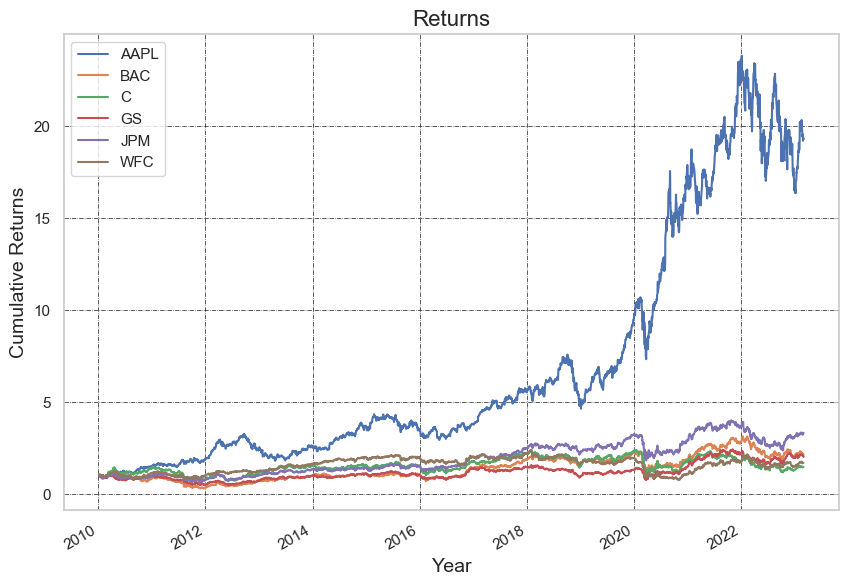

In [292]:
# Plot all the close prices
((data['Close'].pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

You can analyze this data, create a trading strategy and analyze the performance of the strategy using the pyfolio package. It computes the Sharpe ratio, Sortino ratio, maximum drawdowns and many other metrics.

## Conclusion

Through data analysis, Deutsche Bank is able to identify potential risks associated with its investment products and take appropriate measures to manage those risks. This helps the bank make informed decisions about which products to invest in and which to avoid, ultimately reducing the overall risk of its investment portfolio.

# Reference

1. https://investor-relations.db.com/share/share-information/historical-share-prices
2. https://www.zaner.com/3.0/education/technicalstudies/MA.asp#top
3. https://www.linkedin.com/pulse/stock-data-analysis-using-python-sakshi-grover/ (have to do some of these)
4. https://github.com/LearnPythonWithRune/FinancialDataAnalysisWithPython
5. https://www.youtube.com/playlist?list=PLvMRWNpDTNwQF6t_Tq7aVX0AI6H1avSpv
6. https://github.com/arunsinp/Python-programming/blob/main/Python-fundamental/Tutorials/